# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

## Import functions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

## Lasso Model (multi linear regression, Cross-Validation)

## Tunage du modèle

In [3]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF4pc_N.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

Computing regularization path using the coordinate descent lasso...


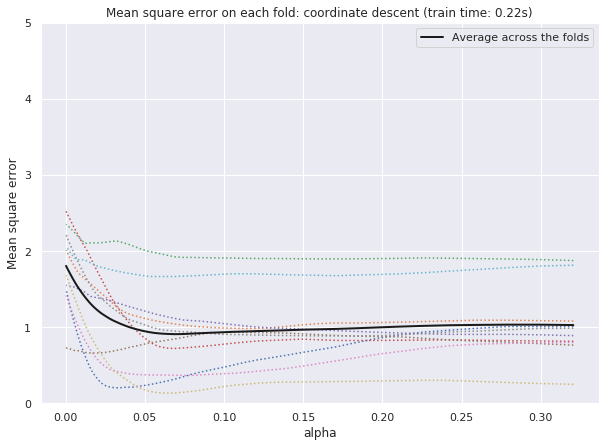

In [4]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Computing regularization path using the coordinate descent lasso...


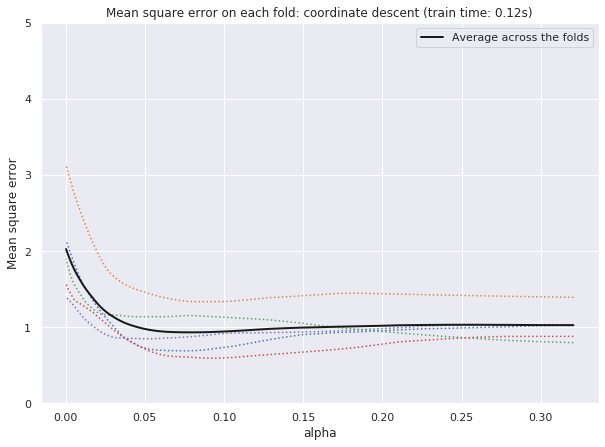

In [5]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV5.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Creation du modèle

In [3]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF4pc_N.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [4]:
alpha = 0.05

In [5]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -7.7518907528959e-09
Coefficients: 
 [ 0.         -0.         -0.11004383 -0.          0.         -0.25080097
  0.08701591 -0.         -0.05080138  0.          0.          0.
 -0.17918687  0.01325351 -0.         -0.08019078  0.02600234  0.05263568
  0.03572909 -0.20202645  0.         -0.         -0.01290838 -0.05744997
 -0.11749868 -0.          0.15587683 -0.02347282  0.         -0.20308261]
Score: 
 0.405912047332034


In [6]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
#Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

In [7]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [8]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

y_true = y

DFYeq_lasso = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq_lasso['members'] = nb_p_list
DFYeq_lasso['members_0'] = range(0,68,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq_lasso

,y_true,y_eq,members,members_0
0,-1.440426,-0.618932,p311,0
1,0.514258,0.398983,p312,1
2,1.371624,1.161831,p314,2
3,0.556533,0.772778,p316,3
4,0.617908,0.319922,p317,4
...,...,...,...,...
63,-0.846617,-0.514729,p407,63
64,1.448137,0.128010,p409,64
65,-1.374731,0.341312,p410,65
66,0.593777,0.290221,p411,66


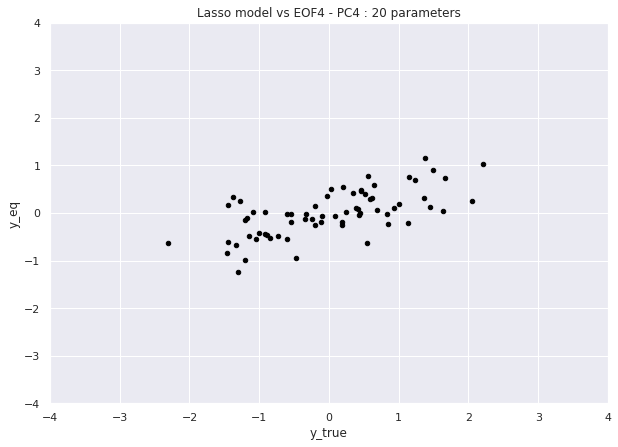

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#print('Coefficient of determination: %.2f'
#      % r2_score(X_test, y_pred))

ax = plt.gca()
title = 'Lasso model vs EOF4 - PC4 : 20 parameters'
DFYeq_lasso.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred_lasso, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE2_Lasso_12.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.3361763]
Coefficient of determination: 0.56


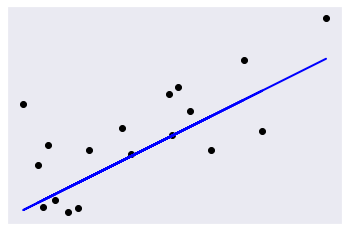

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

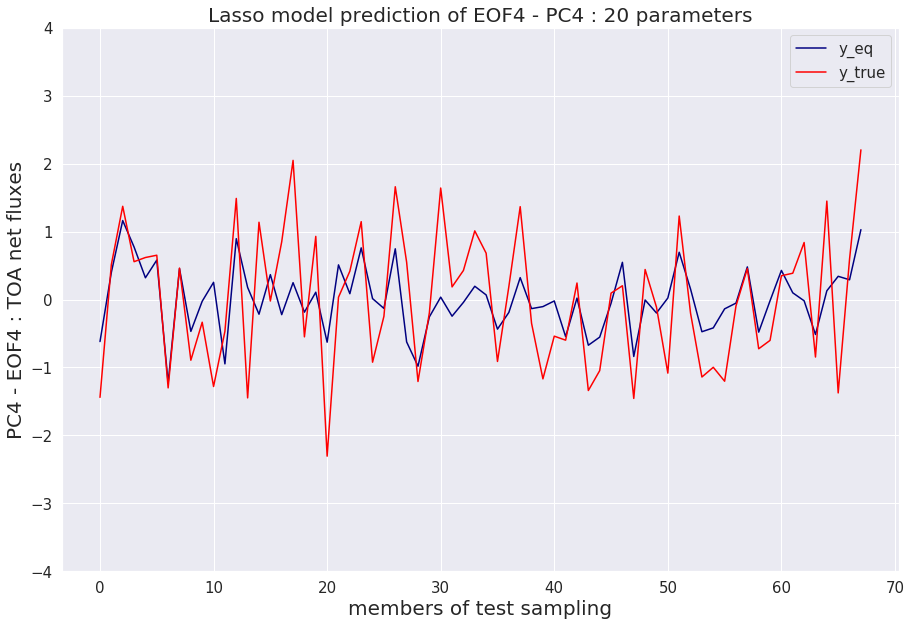

In [11]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq_lasso, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq_lasso, color='red',ax=ax)
plt.title('Lasso model prediction of EOF4 - PC4 : 20 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('PC4 - EOF4 : TOA net fluxes',fontsize=20)
plt.ylim(-4, 4)
ax.tick_params(axis='both', labelsize=15)

## LASSO model : prediction

In [12]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [13]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -7.7518907528959e-09
Coefficients: 
 [ 0.         -0.         -0.11004383 -0.          0.         -0.25080097
  0.08701591 -0.         -0.05080138  0.          0.          0.
 -0.17918687  0.01325351 -0.         -0.08019078  0.02600234  0.05263568
  0.03572909 -0.20202645  0.         -0.         -0.01290838 -0.05744997
 -0.11749868 -0.          0.15587683 -0.02347282  0.         -0.20308261]
Score: 
 0.405912047332034


In [14]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

AKN            0.000000
ALPHAT        -0.000000
ALD           -0.110044
ALMAVE        -0.000000
AGREF          0.000000
AGRE1         -0.250801
AGRE2          0.087016
RAUTEFR       -0.000000
RQLCR         -0.050801
RAUTEFS        0.000000
RQICRMIN       0.000000
RQICRMAX       0.000000
TFVL          -0.179187
TFVI           0.013254
TFVR          -0.000000
TFVS          -0.080191
RKDN           0.026002
RKDX           0.052636
TENTR          0.035729
TENTRX        -0.202026
VVN            0.000000
VVX           -0.000000
ALFX          -0.012908
FNEBC         -0.057450
GCTURB        -0.117499
RLWINHF_ICE   -0.000000
RLWINHF_LIQ    0.155877
RSWINHF_ICE   -0.023473
RSWINHF_LIQ    0.000000
REFLCAPE      -0.203083
Name: 0, dtype: float64

In [15]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[0.4299489540512687,
 -0.10453400634708496,
 -0.6884096801423814,
 -0.4153567327858186,
 0.09023843374210459,
 0.7672370810680827,
 -0.3181765562796667,
 0.3999293933713041,
 0.33030041995638315,
 -0.4980819092222614,
 -0.15941071517595032,
 -0.46224156831412916,
 0.18018674811328755,
 0.3394204751027098,
 -0.13523414940940243,
 -0.48257935650075195,
 0.45789717782360956,
 -0.7178459133622432,
 -0.03372937265887213,
 0.39386106066907034,
 0.581627248311097,
 0.16950931043178846,
 -0.1630710007389846,
 -0.029122286775321485,
 0.29963156421141396,
 -0.6050862245970356,
 0.5878059430593316,
 0.80081348766062,
 0.2111556059879629,
 0.26785242615893035,
 -0.6209422910363565,
 -0.36369054300646375,
 -0.1584180433519493,
 0.21355363199576663,
 -0.7897196284577465,
 0.9878078045234436,
 -0.0700671563402896,
 -0.5183831254661017,
 0.557046075786507,
 0.04617928432422577,
 0.033332876766092985,
 0.1401434277147447,
 -0.3970070020199867,
 0.6317883608397502,
 0.20497526992791193,
 -0.395217134148

In [16]:
members = arange(68,1068,1)
DFYpred_lasso = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_lasso

,y_pred,members
0,0.429949,68.0
1,-0.104534,69.0
2,-0.688410,70.0
3,-0.415357,71.0
4,0.090238,72.0
...,...,...
995,0.719348,1063.0
996,0.199087,1064.0
997,0.525337,1065.0
998,-0.461059,1066.0


## Multi Linear Regression model PC4 - EOF4

In [17]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF4pc_N.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [18]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -7.751890556019838e-09
Coefficients: 
 [ 0.11047367  0.06463321 -0.24032414  0.08736935  0.17848901 -0.47156343
  0.14825704 -0.17602528 -0.24586548  0.07866594  0.12125793  0.14741232
 -0.19914971  0.17897432 -0.11096264 -0.05443095  0.08795795  0.09208379
  0.18549743 -0.18979588 -0.06023686  0.00844675 -0.14251735 -0.10827446
 -0.34264111  0.10537767  0.39305797 -0.17500532  0.11129704 -0.28469756]
Score: 
 0.5300817446576143


In [19]:
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

In [20]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [21]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
DFYeq['members_0'] = range(0,68,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members,members_0
0,-1.440426,-0.688614,p311,0
1,0.514258,0.590666,p312,1
2,1.371624,2.189598,p314,2
3,0.556533,1.061776,p316,3
4,0.617908,0.659166,p317,4
...,...,...,...,...
63,-0.846617,-0.318132,p407,63
64,1.448137,0.819088,p409,64
65,-1.374731,0.389424,p410,65
66,0.593777,0.564677,p411,66


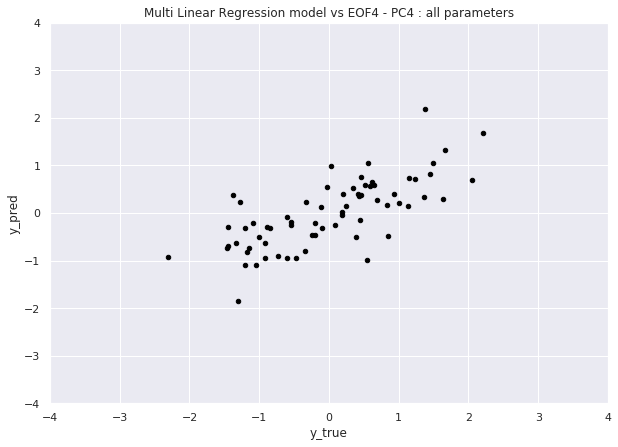

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Multi Linear Regression model vs EOF4 - PC4 : all parameters'
DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title(title)
plt.xlim(-4,4)
plt.ylim(-4,4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.54667217]
Coefficient of determination: 0.54


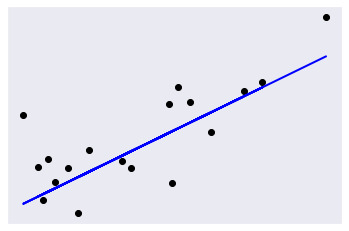

In [23]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

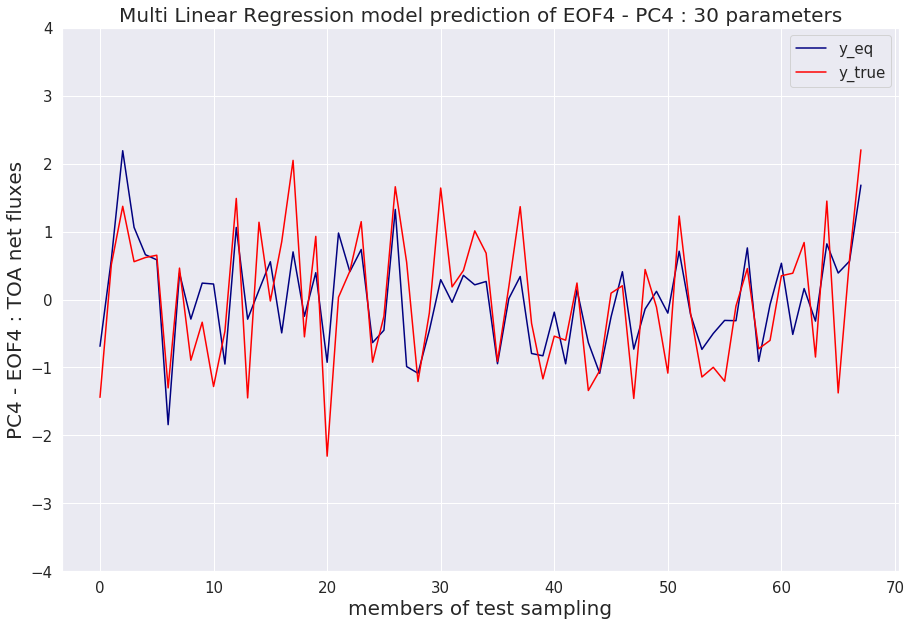

In [24]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq, color='red',ax=ax)
plt.title('Multi Linear Regression model prediction of EOF4 - PC4 : 30 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('PC4 - EOF4 : TOA net fluxes',fontsize=20)
plt.ylim(-4, 4)
ax.tick_params(axis='both', labelsize=15)

## Multi Linear Regression model : prediction

In [25]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [26]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[0.7955151191379284,
 -0.08983175686659896,
 -1.199579310500542,
 -0.235377573279188,
 -0.6326436685360612,
 0.7788755155891856,
 -1.227294018014831,
 0.09252740210463645,
 -0.31326246723987,
 -1.6442344764310968,
 0.3799219480995649,
 0.7121201604321418,
 -0.7193645014545751,
 0.10426017681670877,
 -0.7471180434049496,
 -1.176802522394818,
 0.8999037077369252,
 -1.2107114928359908,
 -0.4596586762887483,
 1.054361443580352,
 0.17804185273069523,
 -0.7112225540249951,
 0.3812196373745199,
 -0.6441436457473361,
 1.1457620165747915,
 -1.559604625955324,
 0.4241691390537485,
 0.8565836508138237,
 2.211816045231442,
 0.23910252006588373,
 -0.5491973753521129,
 -1.0407646815989144,
 1.8965448799899383,
 -0.7729569701907536,
 -2.4228766746403014,
 1.9437028484861363,
 -0.5918464130408027,
 -1.5245669686849643,
 0.5725424557585798,
 0.2524150249538947,
 -1.2194406951105414,
 0.943225602607079,
 -0.49851876581657106,
 1.8750570274554013,
 1.2626654598903793,
 -0.4734039320587762,
 -0.2535197193

In [27]:
members = arange(68,1068,1)
DFYpred = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred

,y_pred,members
0,0.795515,68.0
1,-0.089832,69.0
2,-1.199579,70.0
3,-0.235378,71.0
4,-0.632644,72.0
...,...,...
995,0.651827,1063.0
996,-0.046318,1064.0
997,0.835966,1065.0
998,-0.673065,1066.0


# Plotting Part

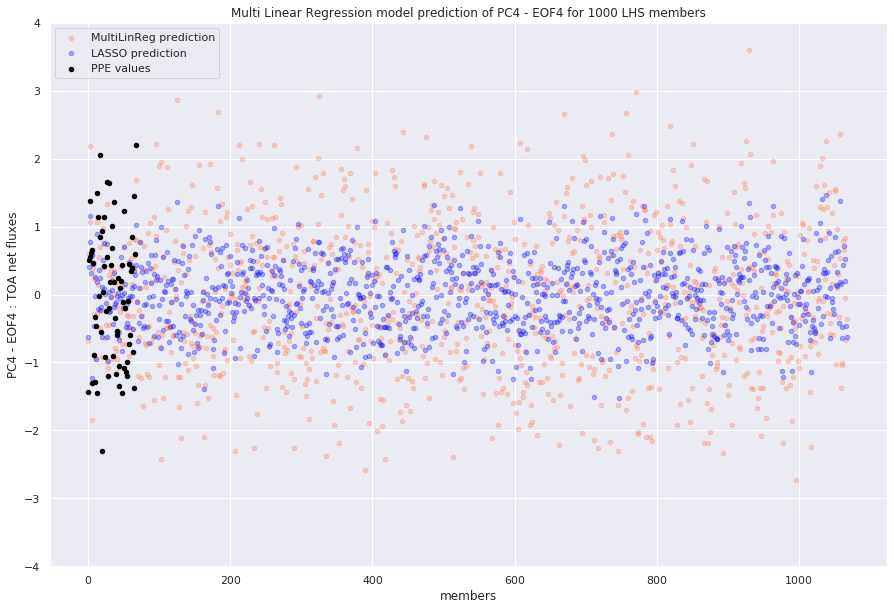

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
title = 'Multi Linear Regression model prediction of PC4 - EOF4 for 1000 LHS members'

# y_true validation
DFYeq.plot(kind='scatter', x='members_0', y='y_eq', color='coral', alpha = 0.3,
                     style='.', legend=False, ax = ax)
DFYeq_lasso.plot(kind='scatter', x='members_0',legend=False, y='y_eq', color='blue', alpha = 0.3,
                     style='.', ax = ax)

# (y_true) : PC1 - EOF1 dans l'ensemble
DFYeq.plot(kind='scatter', x='members_0', y='y_true', color='black', 
                     style='.', ax = ax)

# LHS Prediction
DFYpred.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='coral', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_lasso.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='blue', 
             alpha=0.3,linewidth=1.0,ax=ax)


plt.xlabel('members')
plt.ylabel('PC4 - EOF4 : TOA net fluxes')
plt.legend(['MultiLinReg prediction', 'LASSO prediction', 'PPE values'])
plt.title(title)
#plt.xlim(-4,200)
plt.ylim(-4,4)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [29]:
MultiLinReg_validation = DFYeq['y_eq'].values
MultiLinReg_prediction = DFYpred['y_pred'].values

LASSO_validation = DFYeq_lasso['y_eq'].values
LASSO_prediction = DFYpred_lasso['y_pred'].values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_validation_eof4.npy', 
        MultiLinReg_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof4.npy', 
        MultiLinReg_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_validation_eof4.npy', 
        LASSO_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof4.npy', 
        LASSO_prediction)